# Histograms

<span> Plotting histograms for distributions is a common task in every dataset. The basic blue histogram can be boring and dull in matplotlib. Therefore I went plotting some histograms using a bunch of packages, attempting to make the plot a bit nicer.</span>

### Import Preliminaries

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

### Import Data

In [3]:
# Import ufo, drinks, movies, and train data
ufo = pd.read_csv('http://bit.ly/uforeports')
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
train = pd.read_csv('http://bit.ly/kaggletrain')

# View the movies dataframe
movies.head(n=4)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


### Basic Histogram

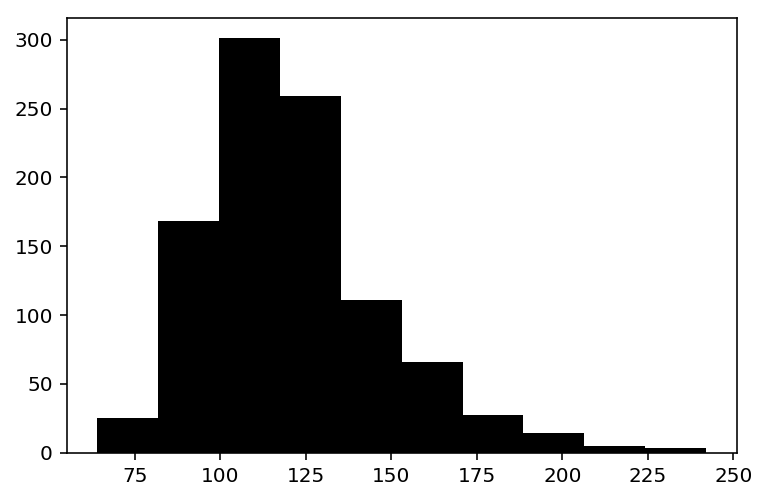

In [5]:
# Shortened version with not addditonal formatting
movies.duration.hist(color='black'); plt.grid(False)

### Preferred Histogram

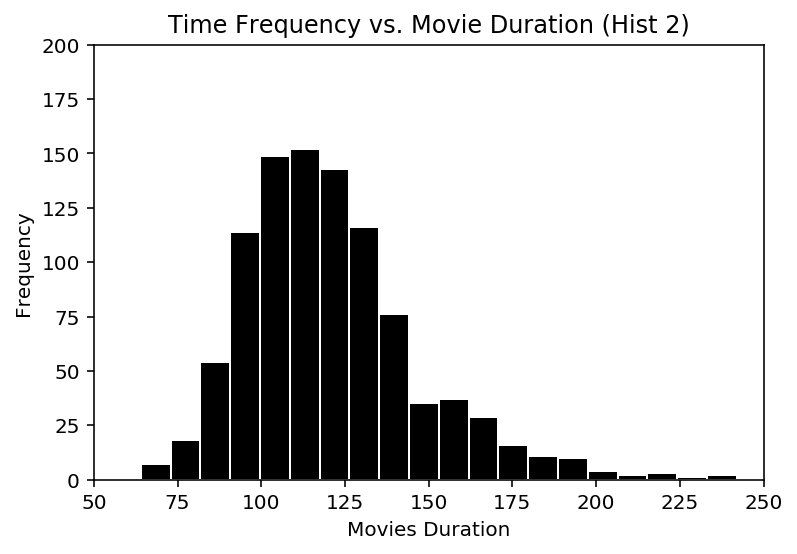

In [6]:
# Preferred setup with axis labels, bins, and white edgecolor
movies.duration.hist(bins = 20, color='black', 
                     xlabelsize=10, ylabelsize=10, edgecolor='w')
plt.title('Time Frequency vs. Movie Duration (Hist 2)')
plt.xlabel('Movies Duration')
plt.ylabel('Frequency')
plt.axis([50, 250, 0, 200])
plt.grid(False)

###  Horizontal Preferred Histogram

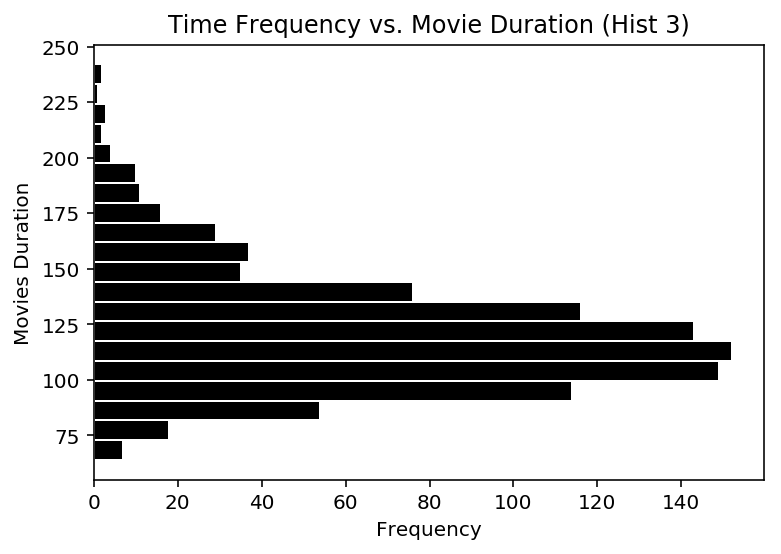

In [7]:
# Sames set up but know horizontal

movies.duration.hist(bins = 20, color='black', 
                     xlabelsize=10, ylabelsize=10, edgecolor='w', orientation='horizontal')
plt.title('Time Frequency vs. Movie Duration (Hist 3)')
plt.ylabel('Movies Duration')
plt.xlabel('Frequency')
plt.grid(False)

### GG Plot Histogram

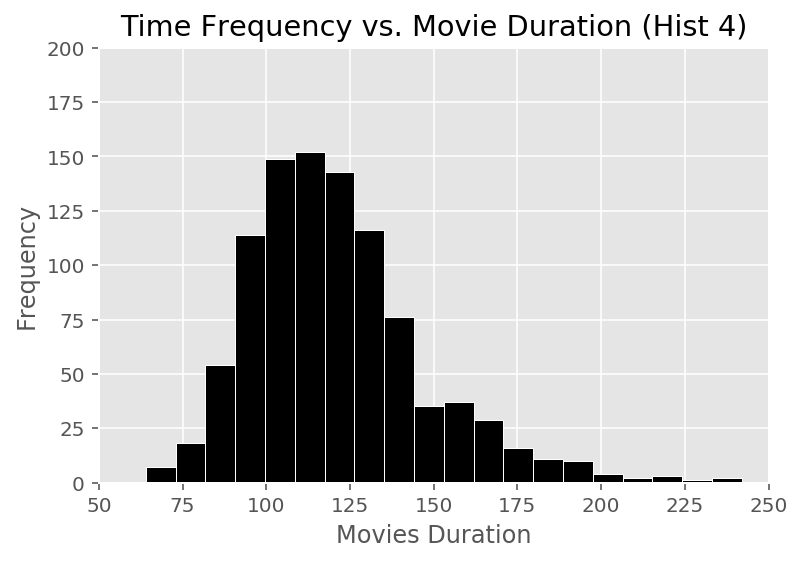

In [8]:
# Set the matplotlib gg plot style
matplotlib.style.use('ggplot')

# plot the histrogram
movies.duration.hist(bins = 20, color='black', 
                     xlabelsize=10, ylabelsize=10, edgecolor='w')
plt.title('Time Frequency vs. Movie Duration (Hist 4)')
plt.xlabel('Movies Duration')
plt.ylabel('Frequency')
plt.axis([50, 250, 0, 200])
plt.grid(True)

### Mark the Mean on the Histogram

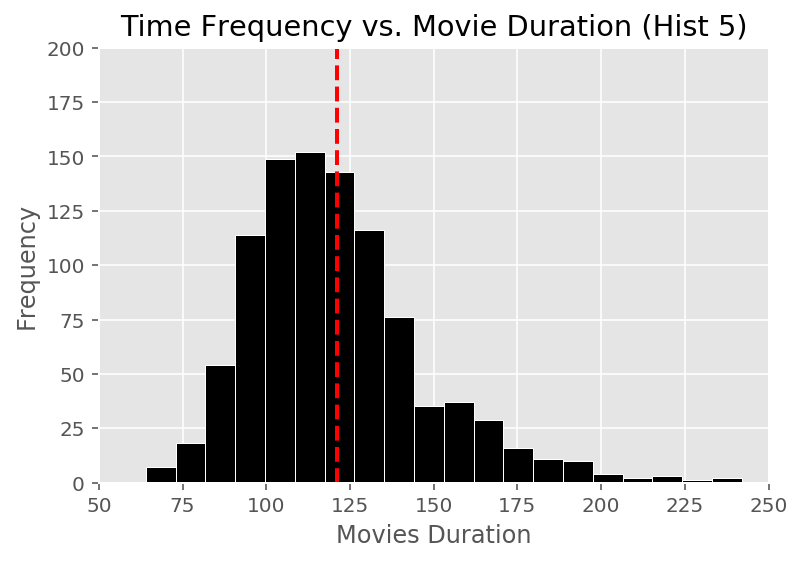

In [46]:
# You can mark the mean by using the AXVLine plot function
movies.duration.hist(bins = 20, color='black', 
                     xlabelsize=10, ylabelsize=10, edgecolor='white')
plt.title('Time Frequency vs. Movie Duration (Hist 5)')
plt.xlabel('Movies Duration')
plt.ylabel('Frequency')
plt.axis([50, 250, 0, 200])
plt.axvline(movies.duration.mean(), color='r', linestyle='dashed', linewidth=2);

### Stepped Histogram

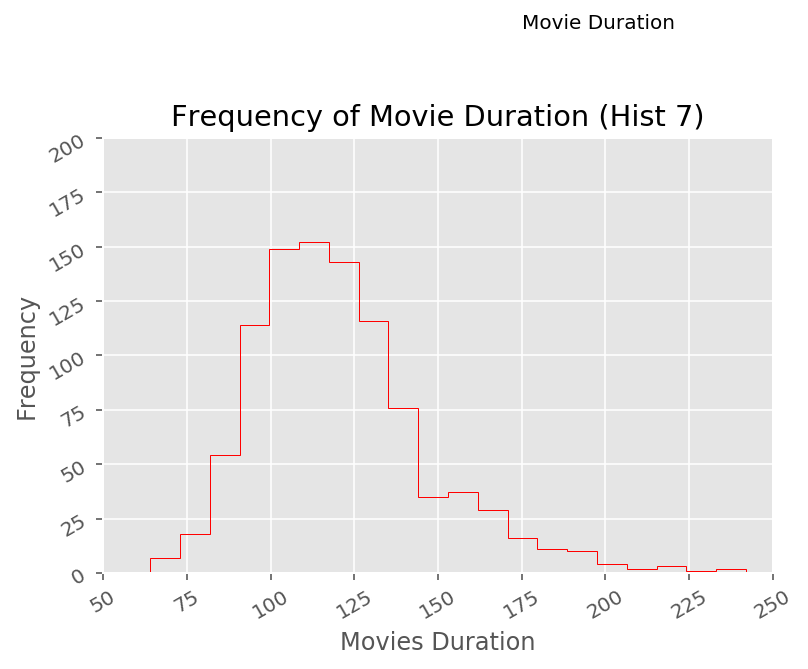

In [45]:
# Stepped histogram with rotated axis labels on the y and x-axis
movies.duration.hist(bins = 20,edgecolor='r',histtype='step', 
                     xlabelsize=10, ylabelsize=10, xrot=30, yrot=30 )
plt.title('Frequency of Movie Duration (Hist 7)')
plt.xlabel('Movies Duration')
plt.ylabel('Frequency')
plt.axis([50, 250, 0, 200])
plt.grid(True)
plt.text(175,250 , 'Movie Duration');

### Testing Rotating Y and X Labels

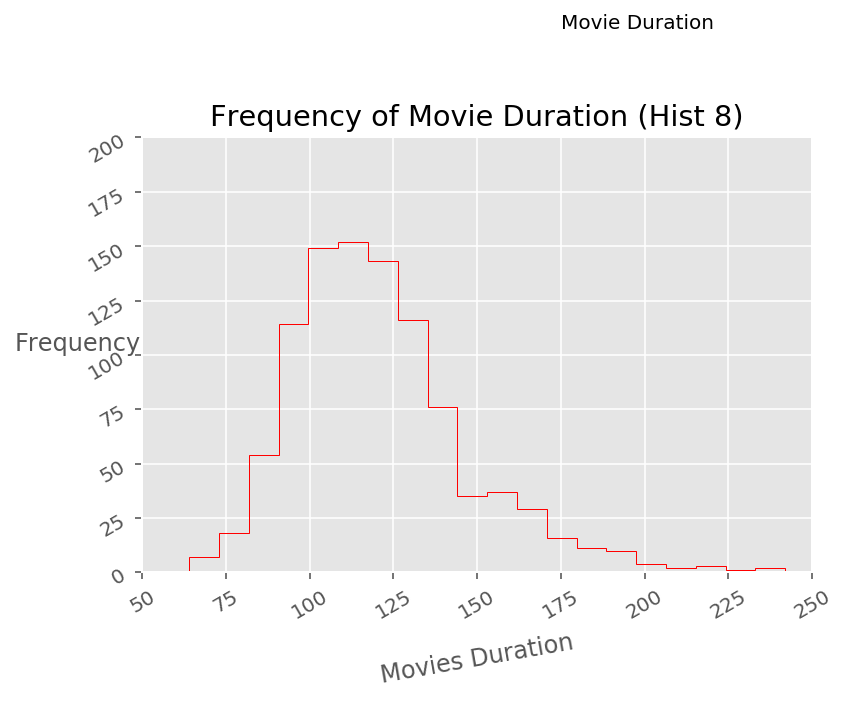

In [25]:
# You can rotate the x and y labesl (context specific)
movies.duration.hist(bins = 20, edgecolor='r',histtype='step', 
                     xlabelsize=10, ylabelsize=10, xrot=30, yrot=30)
plt.title('Frequency of Movie Duration (Hist 8)')
plt.xlabel('Movies Duration', rotation = 10)
plt.ylabel('Frequency', rotation = 0)
plt.axis([50, 250, 0, 200])
plt.grid(True)
plt.text(175,250 , 'Movie Duration');

### Stacked Histogram

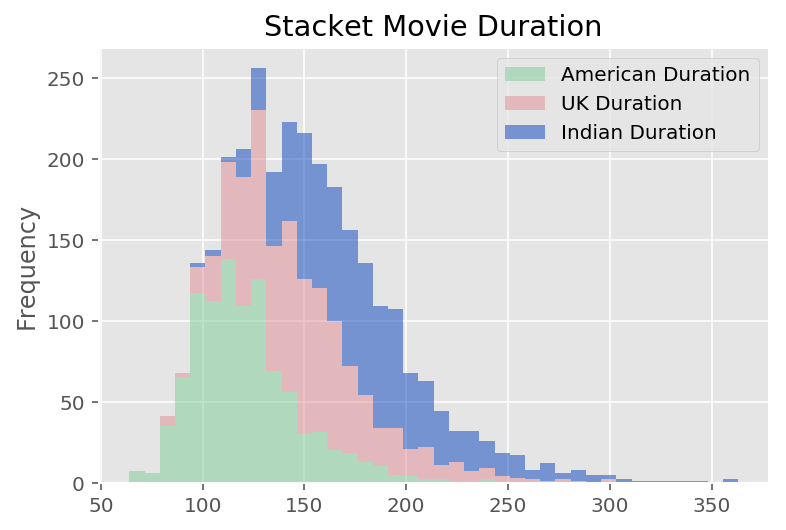

In [44]:
# Stacked histogram with transparency
# Note: prior data wrangling necessary when plotting with pandas
movies_stacked = pd.DataFrame(movies.duration)
movies_stacked.columns = ['American Duration']
movies_stacked['UK Duration'] = movies.duration *1.25
movies_stacked['Indian Duration'] = movies.duration *1.5
movies_stacked.head(n=1)
movies_stacked.plot.hist(stacked=True, bins=40, alpha = 0.5,  color=['#7BCC96','#E08C94','#0742BC'] )
plt.title("Stacket Movie Duration");

### Histograme Plots on Dataframes

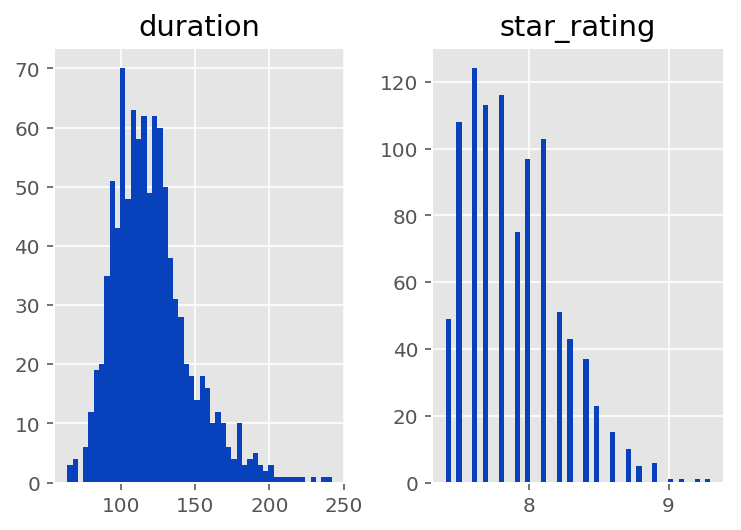

In [34]:
# You can also ally the hist method to any entire dataframe
movies.hist(bins =50,stacked=True, color='#0742BC');

### Overlayed Histgrams

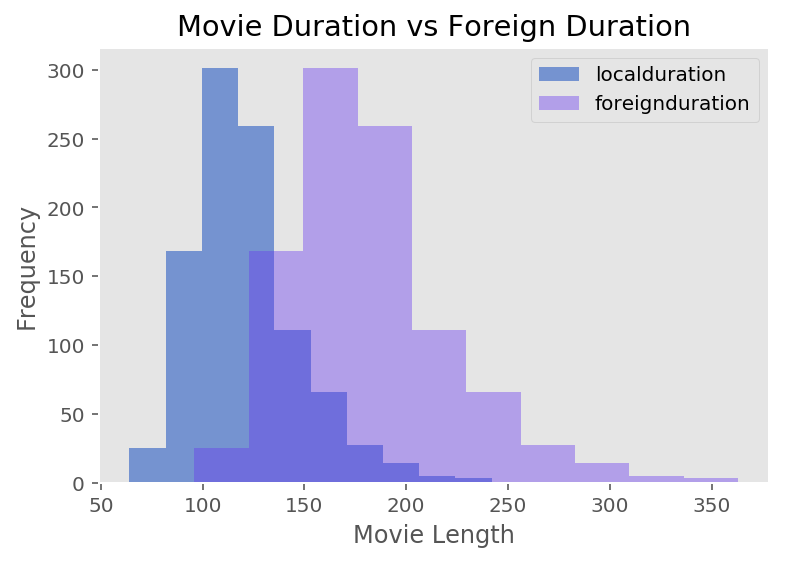

In [42]:
# Overlayed histgrams with transparency
movies['localduration'] = movies.duration
movies['foreignduration'] = movies.localduration * 1.5

fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.hist(movies.localduration, color='#0742BC', alpha=.5)
_ = ax.hist(movies.foreignduration, color='#6638F0', alpha=.4)

plt.title('Movie Duration vs Foreign Duration')
plt.xlabel('Movie Length')
plt.ylabel('Frequency')
plt.grid(False)
plt.legend();

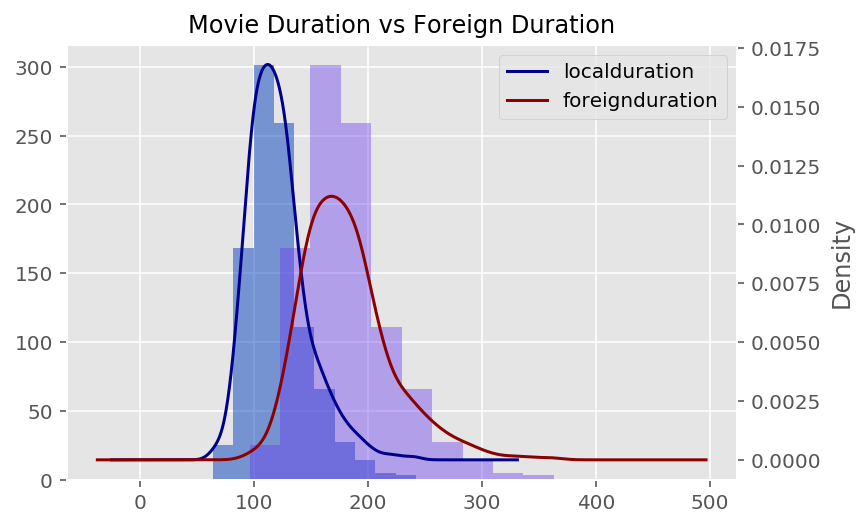

In [43]:
# Overlayed histgrams with transparency and a kernel density plot 
movies['localduration'] = movies.duration
movies['foreignduration'] = movies.localduration * 1.5

fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.hist(movies.localduration, color='#0742BC', alpha=.5)
_ = ax.hist(movies.foreignduration, color='#6638F0', alpha=.4)

ax1 = ax.twinx()
movies.localduration.plot(kind='kde', ax=ax1, color = 'darkblue')
movies.foreignduration.plot(kind='kde', ax=ax1, color='darkred')
plt.title('Movie Duration vs Foreign Duration', fontsize=12)
plt.grid(False)
plt.xlabel('Movie Duration')
plt.legend();

Author: Kavi Sekhon